Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [3]:
DATA_FOLDER = 'final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [14]:
transactions.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [17]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [18]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [19]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [20]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [21]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%d.%m.%Y')

In [22]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [36]:
from datetime import date

In [37]:
#sep_transactions = transactions[(transactions['date']>='2014-09-01') & (transactions['date']<'2014-09-30')]
sep_transactions = transactions[(transactions['date'] >= date(2014, 9, 1))&(transactions['date'] <= date(2014, 9, 30))]
sep_transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1953691,2014-09-24,20,5,1039,899.0,1.0
1953692,2014-09-27,20,5,1015,449.0,1.0
1953693,2014-09-07,20,5,1329,399.0,1.0
1953694,2014-09-27,20,5,984,399.0,1.0
1953695,2014-09-08,20,5,984,399.0,1.0


In [40]:
sep_transactions['revenue'] = sep_transactions['item_price'] * sep_transactions['item_cnt_day']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [41]:
sep_transactions[sep_transactions['item_cnt_day'] == -1].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
1954265,2014-09-17,20,4,5591,1590.0,-1.0,-1590.0
1954274,2014-09-23,20,4,5657,4490.0,-1.0,-4490.0
1954294,2014-09-18,20,4,5814,1199.0,-1.0,-1199.0
1954306,2014-09-23,20,4,5669,3190.0,-1.0,-3190.0
1955145,2014-09-13,20,5,7342,299.0,-1.0,-299.0


In [44]:
max_revenue = sep_transactions.groupby(['shop_id'])['revenue'].sum().max()

In [45]:
# YOUR CODE GOES HERE

max_revenue = max_revenue # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [47]:
summer_transactions = transactions[(transactions['date'] >= date(2014, 6, 1))&(transactions['date'] <= date(2014, 8, 31))]
summer_transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1705909,2014-06-15,17,26,9532,399.00,1.0
1705910,2014-06-10,17,26,9507,149.00,1.0
1705911,2014-06-13,17,26,9509,246.32,1.0
1705912,2014-06-03,17,26,9532,399.00,1.0
1705913,2014-06-08,17,26,9532,399.00,1.0


In [50]:
print(summer_transactions['date'].max())
print(summer_transactions['date'].min())

2014-08-31 00:00:00
2014-06-01 00:00:00


In [52]:
summer_transactions['revenue'] = summer_transactions['item_price'] * summer_transactions['item_cnt_day']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
summer_trans_catids = summer_transactions.merge(items, how='inner', on='item_id')

In [55]:
summer_trans_catids.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,item_name,item_category_id
0,2014-06-15,17,26,9532,399.0,1.0,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1,2014-06-03,17,26,9532,399.0,1.0,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
2,2014-06-08,17,26,9532,399.0,1.0,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
3,2014-06-11,17,26,9532,399.0,1.0,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
4,2014-06-19,17,26,9532,399.0,1.0,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30


In [70]:
summer_trans_catids.groupby(['item_category_id'])['revenue'].sum().idxmax()

20

In [71]:
cat_id = summer_trans_catids.groupby(['item_category_id'])['revenue'].sum().idxmax()

In [72]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = cat_id# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [73]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [82]:
#transactions.groupby(['item_id']).nunique()
item_cnt_contant_price = (transactions.groupby('item_id')['item_price'].nunique()==1).sum()

In [83]:
# YOUR CODE GOES HERE

num_items_constant_price = item_cnt_contant_price # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [91]:
transactions[(transactions['shop_id'] == 25) &  
             (transactions['date'] >= date(2014, 12, 1))&
             (transactions['date'] <= date(2014, 12, 31))].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2295837,2014-12-14,23,25,21752,399.0,1.0
2295838,2014-12-13,23,25,21752,399.0,3.0
2295839,2014-12-26,23,25,21733,149.0,1.0
2295840,2014-12-31,23,25,21732,149.0,1.0
2295841,2014-12-30,23,25,21726,149.0,1.0


In [93]:
print(transactions[(transactions['shop_id'] == 25) &  
             (transactions['date'] >= date(2014, 12, 1))&
             (transactions['date'] <= date(2014, 12, 31))]['date'].max())

print(transactions[(transactions['shop_id'] == 25) &  
             (transactions['date'] >= date(2014, 12, 1))&
             (transactions['date'] <= date(2014, 12, 31))]['date'].min())

2014-12-31 00:00:00
2014-12-01 00:00:00


In [114]:
dec_trans = transactions[(transactions['shop_id'] == 25) &  
             (transactions['date'] >= date(2014, 12, 1))&
             (transactions['date'] <= date(2014, 12, 31))]

In [115]:
dec_trans.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2295837,2014-12-14,23,25,21752,399.0,1.0
2295838,2014-12-13,23,25,21752,399.0,3.0
2295839,2014-12-26,23,25,21733,149.0,1.0
2295840,2014-12-31,23,25,21732,149.0,1.0
2295841,2014-12-30,23,25,21726,149.0,1.0


In [155]:
number_items_sold_dec = dec_trans.groupby(['date'])['item_cnt_day'].sum()

In [157]:
number_items_sold_dec.index

DatetimeIndex(['2014-12-01', '2014-12-02', '2014-12-03', '2014-12-04',
               '2014-12-05', '2014-12-06', '2014-12-07', '2014-12-08',
               '2014-12-09', '2014-12-10', '2014-12-11', '2014-12-12',
               '2014-12-13', '2014-12-14', '2014-12-15', '2014-12-16',
               '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-20',
               '2014-12-21', '2014-12-22', '2014-12-23', '2014-12-24',
               '2014-12-25', '2014-12-26', '2014-12-27', '2014-12-28',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='date', freq=None)

In [161]:
number_items_sold_dec.var()

117167.70229885059

In [135]:
number_items_sold_dec1 = pd.DataFrame(number_items_sold_dec)

In [137]:
number_items_sold_dec1.reset_index(level=0, inplace=True)

In [138]:
number_items_sold_dec1.head()

,date,item_cnt_day
0,2014-12-01,153.0
1,2014-12-02,169.0
2,2014-12-03,195.0
3,2014-12-04,164.0
4,2014-12-05,300.0


In [140]:
number_items_sold_dec1['item_cnt_day'].head()

0    153.0
1    169.0
2    195.0
3    164.0
4    300.0
Name: item_cnt_day, dtype: float64

In [154]:
variance = number_items_sold_dec1.var()

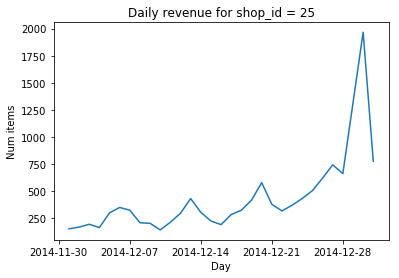

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [162]:
shop_id = 25

total_num_items_sold = number_items_sold_dec # YOUR CODE GOES HERE
days =  number_items_sold_dec.index # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = number_items_sold_dec.var() # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [164]:
STUDENT_EMAIL = 'anuraggdeshmukh@gmail.com' # EMAIL HERE
STUDENT_TOKEN = 'C2Ey7sdGYyjsrnq3' # TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [165]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)